# 0.0 Loading Data Sets and Library (Players.csv and Sessions.csv) 

In [1]:
## Run this cell containing needed libraries 
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players_url <- "https://raw.githubusercontent.com/matthewgmarbella-dotcom/95456646_PPS/refs/heads/main/players.csv"
players_data <- read_delim(players_url, delim = ",") |>
    glimpse()

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [3]:
sessions_url <- "https://raw.githubusercontent.com/matthewgmarbella-dotcom/95456646_PPS/refs/heads/main/sessions.csv"
sessions_data <- read_delim(sessions_url, delim = ",") |>
    glimpse()

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


# 1.0 Data Description 

## 1.1 Comments on Data 

**Table 1: Variable Names, Types and Origin Data Frames**

| Variable Name   | Variable Type | Origin Data Frame |
| :---------------- | :------: |  :----: |
| experience         |   character   | players |
| hashedEmail           |   character   | players + sessions |
| name     |  character   | players |
| gender  |  character   | players |
| played_hours         |   double   | players |
| age           |   double   | players |
| start_time     |  character   | sessions |
| end_time  |  character   | sessions |
| original_start_time           |   double   | sessions|
| original_end_time     |  double   | sessions |
| subscribe     |  logical   | players |


Looking at the table, "hashedEmail" is seen across both data frames. This is the identifier for a player. Variables from the "Player" data frame contain player information. Meanwhile, variables from the "Session" data frame contain information on a session

**Table 2: Number of Observations in Each Data Frame**
| Data Frame              | # of Observations |
| :---------------- | :------: |
|  Players        |   196   | 
| Sessions           |   1,535   |

The number of observations in the "players" data frame can be interpreted as the number of players. Meanwhile in the "sessions" data frame, it can be interpreted as the number of sessions played. 


## 1.2 Summary Statistics

**Table 3. Mean values for Age and played_hours**

In [4]:
players_smry <- players_data |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm = TRUE) |>
    round(2)
players_smry


played_hours,Age
<dbl>,<dbl>
5.85,21.14


The average age of a player is 21.14 and played for about an average of 5.85 hours. 

**Table 4. Mean values for Original Start and End Time**

In [5]:
sessions_smry <- sessions_data |>
    select(original_start_time,original_end_time) |>
    map_dfr(mean, na.rm = TRUE) |>
    mutate(across(everything(), ~sprintf('%.2e', .)))
sessions_smry

original_start_time,original_end_time
<chr>,<chr>
1.72e+12,1.72e+12


Both original start and end time are identical. This means that all players played around the same window of time.

## 1.3 Issues with Data

Looking at the data, both the data sets are tidy because each column is one variable and each row is one observation. One issue is original start and end time return same values. To add, "Age" is being expressed as a double instead of an integer. 

# 2.0 Questions

I have chosen to address **Question 2**.

Can **Age** and **Experience** predict **played hours** in the "players" data set? 

This helps answer question 2 by predicting what type of player profile would most likely play the most on the server, giving the most data. 

In order to do this, the categorical variable, Experience, must be transformed into dummy variables like "experience_veteran" in order for it to be used as a predictor. 

# 3.0 Exploratory Data Analysis and Visualization


The dataset **"players.csv"** was previously loaded into R through a URL in the **0.0** section. 

The mean of the quantitative variables has already been calculated in the **1.2 Summary Statistics** section.

In order to better understand the data set, some visualizations can be made. A bar plot was made to compare amounts of hours played between different experiences. 

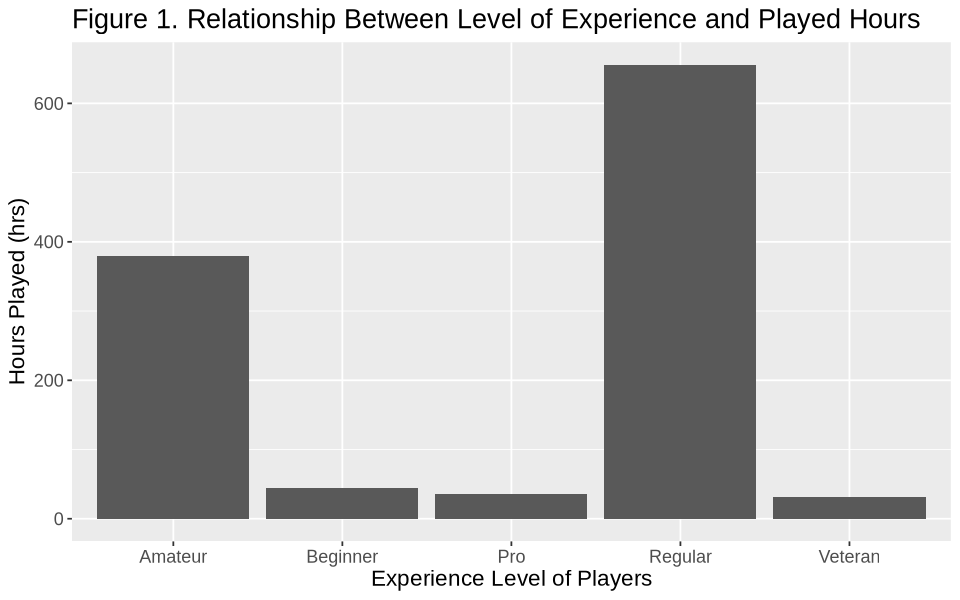

In [6]:
options(repr.plot.height = 5, repr.plot.width = 8)
players_bar <- players_data |> 
    ggplot(aes(x = experience, y = played_hours)) +
            geom_bar(stat= "identity") +
            labs(x = "Experience Level of Players", y = "Hours Played (hrs)") +
            ggtitle("Figure 1. Relationship Between Level of Experience and Played Hours") +
            theme(text = element_text(size = 13.5))
players_bar

Looking at the visualization, Regular and Amateur players contribute the most played hours. One issue is that this does not consider that there might just be more Amateur and Regular players overall. In general, the visualization shows promise that experience **CAN** be a strong predictor.

Next, a scatter plot was made to see the relationship between Age and hours played. Note that the "played_hours" data was put under a log scale in order for the data to be more normally distributed. 

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


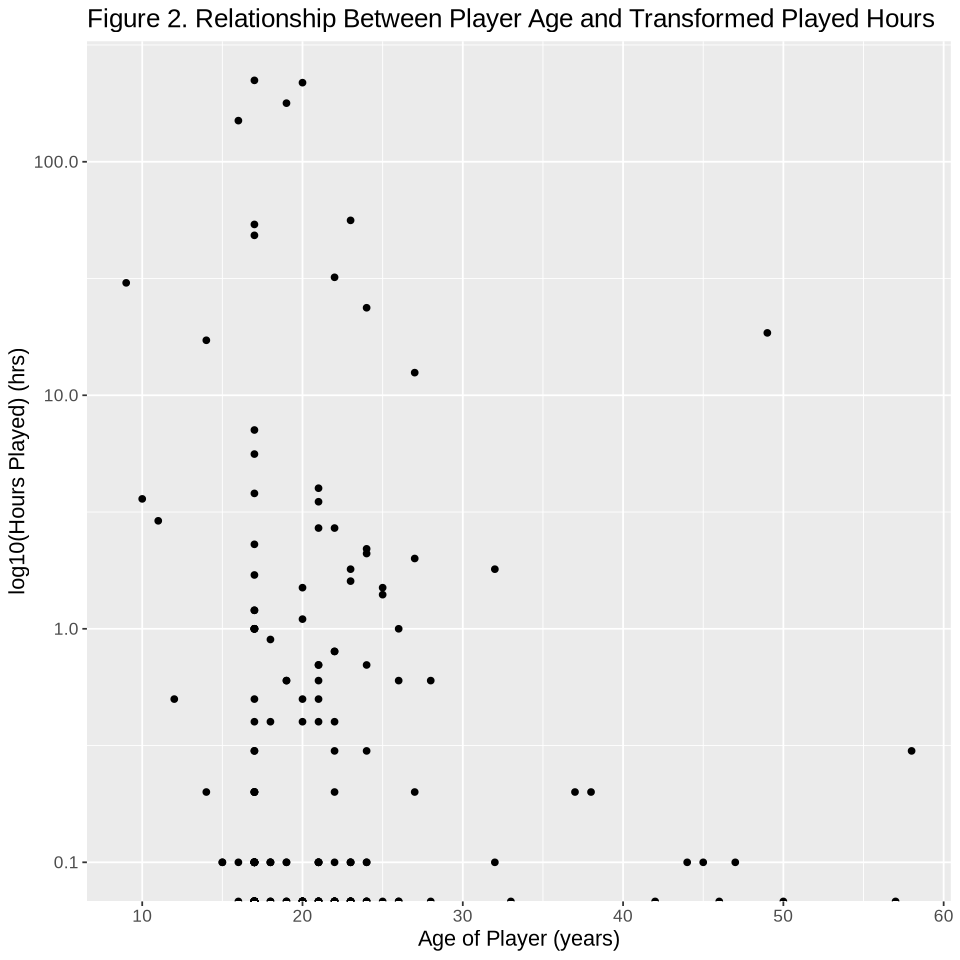

In [7]:
options(repr.plot.height = 8, repr.plot.width = 8)
players_scatter <- players_data |>
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() +
    scale_y_log10() + 
    labs(x = "Age of Player (years)", y = "log10(Hours Played) (hrs)") +
    ggtitle("Figure 2. Relationship Between Player Age and Transformed Played Hours") +
            theme(text = element_text(size = 13))
players_scatter

Looking at the scatter plot, the data points do not seem to follow any trend as they are spread out in a vertical manner. This shows that age is not really a good predictor for hours played. 

# Methods and Plan

Multiple Linear Regression is appropriate to use because a quantitative variable  is the response variable, and a linear regression interprets the trend seen in the relationship between these variables compared to knn-regression.. 

The biggest limitation with this method is that it assumes that the data follows a linear trend. It would not be very accurate if the data follows a different trend.

The model will be evaluated using RMSE, measuring the goodness of fit. Next, the model will be evaluated using RMSPE, predicting unseen data. The goal of these tests is to minimize RMSE and RMSPE. 

In order to do this, the data must be split into training and testing data. A 80% and 20% split while stratifying played_hours. There will be no need for a validation set and cross-validation.